In [1]:
import homcloud.interface as hc

In [10]:
import homcloud.interface as hc

#if __name__ == '__main__':
def repeat(r):
    pdlist = hc.PDList("pointcloud-tsutsu.pdgm")
    pd1 = pdlist.dth_diagram(1)
    pair = pd1.nearest_pair_to(0.04, 0.30)
    lifetime = pair.lifetime()
    minus = lifetime/r
    
    epsilon=[]
    quantity=[]
    
    for i in range(r-1):
        stable_volume = pair.stable_volume(minus*i)
        epsilon += [minus*i]
        quantity += [len(stable_volume.boundary())]
    
    return epsilon, quantity 

In [17]:
epsilon, quantity = repeat(1001)

In [18]:
from matplotlib import pyplot as plt

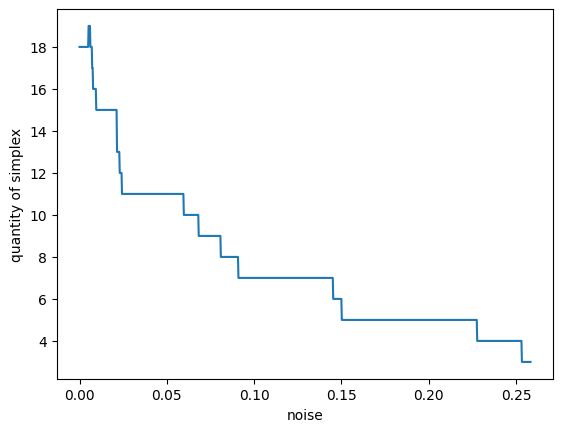

In [23]:
plt.plot(epsilon, quantity)
plt.xlabel('noise')
plt.ylabel('quantity of simplex')
plt.savefig("plateau")
plt.show()